##### **Universidad Galileo**
##### **Postgrado en Análisis y Predicción de Datos** - *Cuarto Trimestre 2024*
##### **Product Development**
##### **Alumno:** Elder Cruz. **Carnet:** 23004456
##### **Alumno:** Walter Reyes. **Carnet:** 23004450
##### **Alumno:** Dayana Gamboa. **Carnet:** 23001913
##### **Alumno:** Rodrigo Cano. **Carnet:** 23001916
##### **Proyecto final:** Create models

### Para este notebook, se presenta el desarrollo de los algoritmos de clasificación para comparar el rendimiento de cada algoritmo y la evaluación distintos hiper-parámetros de cada modelo.

#### Para el proyecto final del curso se ha elegido un dataset de una cartera crediticia de una entidad financiera con el fin de analizar sus variables relacionadas con la rentabilidad de cada segmento comercial existente el cual se espera sea la variable Target para posterior crear un modelo relacionado con la rentabilidad por cliente, segmento o producto.

# 1. Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 2. Carga de datos

In [2]:
dataset_path ='../data/processed/df_loans_FS.csv'

In [3]:
df_Loans = pd.read_csv(dataset_path, delimiter = ",")
df_Loans.head()

,Desembolso,Vencimiento,Saldo$,FechaReporte,PE_30.04.2024,PD_MAX_2024_04_30,LGD_MAX_2024_04_30,PlazoRestante(Dias),Reserva Especifica$,Ab_24,...,FTP_capp_BC,FTP_capp_YJ,TIR_capp_cuad,TIR_capp_cuad_minMaxScaled,Saldo$_capp_cuad_minMaxScaled,FTP_capp_cuad_minMaxScaled,Tasa_Propuesta_capp_cuad_minMaxScaled,Reserva Especifica$_capp_cuad_minMaxScaled,PE_30.04.2024_capp_cuad_minMaxScaled,PlazoRestante(Dias)_capp_cuad_minMaxScaled
0,2022-08-02,2037-04-30,3724668.653,2024-04-30,99427.84220,0.075018,0.3500,4748,72351.20216,0.0750,...,-383.347027,-383.347027,0.000037,0.013661,0.716564,0.922326,0.305537,0.363972,0.990139,0.549219
1,2022-09-12,2039-02-28,2902574.199,2024-04-30,100418.02520,0.097223,0.3500,5417,56339.50477,0.0775,...,-383.347027,-383.347027,0.000066,0.018281,0.558406,0.935660,0.316221,0.283423,1.000000,0.626605
2,2023-10-23,2026-05-25,2573399.796,2024-04-30,50873.84772,0.097223,0.2000,755,49795.28605,0.0750,...,-430.005307,-430.005307,0.000031,0.012580,0.495079,0.842738,0.316221,0.250502,0.506621,0.087334
3,2023-07-17,2028-07-17,2272312.020,2024-04-30,12008.44648,0.014032,0.3796,1539,43969.23758,0.0850,...,-410.248171,-410.248171,0.000100,0.022490,0.437155,0.858364,0.337589,0.221193,0.119585,0.178022
4,2023-11-23,2026-05-25,1707450.764,2024-04-30,33754.79796,0.097223,0.2000,755,28521.49497,0.0750,...,-430.005307,-430.005307,0.000031,0.012607,0.328485,0.842738,0.316221,0.143481,0.336143,0.087334


# 3. EDA - Exploratory Analysis

In [4]:
df_Loans.columns

Index(['Desembolso', 'Vencimiento', 'Saldo$', 'FechaReporte', 'PE_30.04.2024',
       'PD_MAX_2024_04_30', 'LGD_MAX_2024_04_30', 'PlazoRestante(Dias)',
       'Reserva Especifica$', 'Ab_24', 'Tasa_Propuesta', 'bps%',
       'IntAnual_TasaPropuesta', 'Tasa_Costo_Oportunidad', 'FTP', 'TIR',
       'Código Moneda', 'Status Mora', 'SegmentoComercial', 'Nuevo',
       'Brecha_encoded', 'Saldo$_capp', 'PE_30.04.2024_capp',
       'PD_MAX_2024_04_30_capp', 'PlazoRestante(Dias)_capp',
       'Reserva Especifica$_capp', 'Ab_24_capp', 'Tasa_Propuesta_capp',
       'IntAnual_TasaPropuesta_capp', 'FTP_capp', 'TIR_capp',
       'Saldo$_capp_cuad', 'PE_30.04.2024_capp_cuad',
       'PlazoRestante(Dias)_capp_cuad', 'Reserva Especifica$_capp_cuad',
       'Tasa_Propuesta_capp_cuad', 'IntAnual_TasaPropuesta_capp_cuad',
       'FTP_capp_cuad', 'FTP_capp_log', 'FTP_capp_inv', 'FTP_capp_BC',
       'FTP_capp_YJ', 'TIR_capp_cuad', 'TIR_capp_cuad_minMaxScaled',
       'Saldo$_capp_cuad_minMaxScaled', 'FTP_c

In [5]:
df_Loans.shape

(2819, 50)

In [6]:
df = df_Loans.drop(columns=['Desembolso','Vencimiento','FechaReporte'])

df.head()

,Saldo$,PE_30.04.2024,PD_MAX_2024_04_30,LGD_MAX_2024_04_30,PlazoRestante(Dias),Reserva Especifica$,Ab_24,Tasa_Propuesta,bps%,IntAnual_TasaPropuesta,...,FTP_capp_BC,FTP_capp_YJ,TIR_capp_cuad,TIR_capp_cuad_minMaxScaled,Saldo$_capp_cuad_minMaxScaled,FTP_capp_cuad_minMaxScaled,Tasa_Propuesta_capp_cuad_minMaxScaled,Reserva Especifica$_capp_cuad_minMaxScaled,PE_30.04.2024_capp_cuad_minMaxScaled,PlazoRestante(Dias)_capp_cuad_minMaxScaled
0,3724668.653,99427.84220,0.075018,0.3500,4748,72351.20216,0.0750,0.0775,0.0025,288661.8206,...,-383.347027,-383.347027,0.000037,0.013661,0.716564,0.922326,0.305537,0.363972,0.990139,0.549219
1,2902574.199,100418.02520,0.097223,0.3500,5417,56339.50477,0.0775,0.0800,0.0025,232205.9359,...,-383.347027,-383.347027,0.000066,0.018281,0.558406,0.935660,0.316221,0.283423,1.000000,0.626605
2,2573399.796,50873.84772,0.097223,0.2000,755,49795.28605,0.0750,0.0800,0.0050,205871.9837,...,-430.005307,-430.005307,0.000031,0.012580,0.495079,0.842738,0.316221,0.250502,0.506621,0.087334
3,2272312.020,12008.44648,0.014032,0.3796,1539,43969.23758,0.0850,0.0850,0.0000,193146.5217,...,-410.248171,-410.248171,0.000100,0.022490,0.437155,0.858364,0.337589,0.221193,0.119585,0.178022
4,1707450.764,33754.79796,0.097223,0.2000,755,28521.49497,0.0750,0.0800,0.0050,136596.0612,...,-430.005307,-430.005307,0.000031,0.012607,0.328485,0.842738,0.316221,0.143481,0.336143,0.087334


In [7]:
df['SegmentoComercial'].value_counts(normalize=True)

#Recordando los segmentos:
#{0: '1_INMOBILIARIA', 1: '2_NEGOCIO', 2: '3_COMERCIAL', 3: '4_RETAIL', 4: '5_INTERCOMPANY'}

SegmentoComercial
3    0.853849
1    0.061369
0    0.047535
2    0.034409
4    0.002838
Name: proportion, dtype: float64

# 4. Balanceo de clases en target

In [8]:
dataPositiva = df[df['SegmentoComercial'] == 0]
dataPositiva.shape

(134, 47)

In [9]:
dataNegativa = df[df['SegmentoComercial'] == 3]
dataNegativa.shape

(2407, 47)

In [10]:
n = 2*dataPositiva.shape[0]
dataNegativa = dataNegativa.sample(n, random_state=2024, replace = False)

dataNegativa.shape

(268, 47)

In [11]:
completeData = pd.concat([dataPositiva,dataNegativa])
completeData = completeData.sample(len(completeData), replace = False, random_state = 2025) #shuffle - mezclar datos aleatoriamente

completeData.shape

(402, 47)

In [12]:
completeData['SegmentoComercial'].value_counts(normalize=True)

SegmentoComercial
3    0.666667
0    0.333333
Name: proportion, dtype: float64

In [13]:
def encode_target(value):
    if(value == 0):
        return 1
    else:
        return 0

In [14]:
completeData['SegmentoComercial'] = completeData['SegmentoComercial'].map(encode_target)
completeData.head()

,Saldo$,PE_30.04.2024,PD_MAX_2024_04_30,LGD_MAX_2024_04_30,PlazoRestante(Dias),Reserva Especifica$,Ab_24,Tasa_Propuesta,bps%,IntAnual_TasaPropuesta,...,FTP_capp_BC,FTP_capp_YJ,TIR_capp_cuad,TIR_capp_cuad_minMaxScaled,Saldo$_capp_cuad_minMaxScaled,FTP_capp_cuad_minMaxScaled,Tasa_Propuesta_capp_cuad_minMaxScaled,Reserva Especifica$_capp_cuad_minMaxScaled,PE_30.04.2024_capp_cuad_minMaxScaled,PlazoRestante(Dias)_capp_cuad_minMaxScaled
127,52367.078750,246.190823,0.008579,0.5500,610,1688.385732,0.0800,0.0850,0.0050,4451.201694,...,-433.800695,-433.800695,0.000091,0.021482,0.010075,0.839848,0.337589,0.008494,0.002452,0.070561
2705,121604.140000,571.679921,0.008579,0.5500,6635,3739.146043,0.0725,0.0775,0.0050,9424.320850,...,-441.168289,-441.168289,0.000096,0.022090,0.023395,0.834335,0.305537,0.018810,0.005693,0.767496
88,2506.245641,0.000000,0.005313,0.3000,214,29.080704,0.1150,0.1150,0.0000,288.218249,...,-444.401318,-444.401318,0.001275,0.080480,0.000482,0.831955,0.465798,0.000146,0.000000,0.024754
2692,274999.570000,3607.025497,0.035232,0.3796,426,5334.818614,0.0800,0.0900,0.0100,24749.961300,...,-475.174352,-475.174352,0.000115,0.024143,0.052905,0.727191,0.358957,0.026837,0.035920,0.049277
2702,134166.700000,252.950487,0.004982,0.3796,7000,2614.065946,0.0750,0.0775,0.0025,10397.919250,...,-432.764841,-432.764841,0.000096,0.022032,0.025811,0.840633,0.305537,0.013150,0.002519,0.809717


# 5. Construcción de Modelos

In [17]:
# modelos
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV #para hiper-parámetros

# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# gestion train-test
from sklearn.model_selection import train_test_split

# transformaciones
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [18]:
completeData.head()

,Saldo$,PE_30.04.2024,PD_MAX_2024_04_30,LGD_MAX_2024_04_30,PlazoRestante(Dias),Reserva Especifica$,Ab_24,Tasa_Propuesta,bps%,IntAnual_TasaPropuesta,...,FTP_capp_BC,FTP_capp_YJ,TIR_capp_cuad,TIR_capp_cuad_minMaxScaled,Saldo$_capp_cuad_minMaxScaled,FTP_capp_cuad_minMaxScaled,Tasa_Propuesta_capp_cuad_minMaxScaled,Reserva Especifica$_capp_cuad_minMaxScaled,PE_30.04.2024_capp_cuad_minMaxScaled,PlazoRestante(Dias)_capp_cuad_minMaxScaled
127,52367.078750,246.190823,0.008579,0.5500,610,1688.385732,0.0800,0.0850,0.0050,4451.201694,...,-433.800695,-433.800695,0.000091,0.021482,0.010075,0.839848,0.337589,0.008494,0.002452,0.070561
2705,121604.140000,571.679921,0.008579,0.5500,6635,3739.146043,0.0725,0.0775,0.0050,9424.320850,...,-441.168289,-441.168289,0.000096,0.022090,0.023395,0.834335,0.305537,0.018810,0.005693,0.767496
88,2506.245641,0.000000,0.005313,0.3000,214,29.080704,0.1150,0.1150,0.0000,288.218249,...,-444.401318,-444.401318,0.001275,0.080480,0.000482,0.831955,0.465798,0.000146,0.000000,0.024754
2692,274999.570000,3607.025497,0.035232,0.3796,426,5334.818614,0.0800,0.0900,0.0100,24749.961300,...,-475.174352,-475.174352,0.000115,0.024143,0.052905,0.727191,0.358957,0.026837,0.035920,0.049277
2702,134166.700000,252.950487,0.004982,0.3796,7000,2614.065946,0.0750,0.0775,0.0025,10397.919250,...,-432.764841,-432.764841,0.000096,0.022032,0.025811,0.840633,0.305537,0.013150,0.002519,0.809717


In [19]:
# seleccionamos el target y features
X = completeData.drop('SegmentoComercial', axis = 1)
y = completeData['SegmentoComercial']

In [20]:
# split para train y test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2025,shuffle=True)

In [21]:
# creamos el scaler
scaler = MinMaxScaler()

scaler.fit(X_train) #calculamos el scaler

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5.1 Naive Bayes

In [ ]:
NB_Classifier = GaussianNB()
NB_Classifier.fit(X_train_scaled, y_train) #Entrenamiento del modelo

nb_predicts = NB_Classifier.predict(X_test_scaled) #predicciones
roc_auc = roc_auc_score(nb_predicts, y_test)

print("Roc_Auc Score:", roc_auc)
print("Accuracy:", accuracy_score(y_test, nb_predicts))

In [ ]:
nb_predicts

In [ ]:
np.array(y_test)

### 5.1.1 Naive Bayes Optimización con Hyper Parámetros

In [ ]:
# Crear el clasificador
nb_classifier = GaussianNB()

# Definir el grid de hiperparámetros
hyper_params_grid = {
    "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Configuración para la optimización de hiperparámetros
nb_hyp_opt = GridSearchCV(estimator=nb_classifier, param_grid=hyper_params_grid, cv=10, scoring="roc_auc")

# Entrenar el modelo
nb_hyp_opt.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", nb_hyp_opt.best_params_)

In [ ]:
# score del mejor modelo
nb_hyp_opt.best_score_

In [ ]:
pd.DataFrame(nb_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
#nos mostrará un score de los mejores resultados

## 5.2 LDA (Linear Discriminant Analysis)

In [ ]:
LDA_Classifier = LinearDiscriminantAnalysis()
LDA_Classifier.fit(X_train_scaled, y_train) #Entrenamiento del modelo

LDA_predicts = LDA_Classifier.predict(X_test_scaled) #predicciones
roc_auc = roc_auc_score(LDA_predicts, y_test)

print("Roc_Auc Score:", roc_auc)
print("Accuracy:", accuracy_score(y_test, LDA_predicts))

In [ ]:
LDA_predicts

In [ ]:
np.array(y_test)

In [ ]:
# Obtener las probabilidades de la clase positiva (1)
LDA_probabilities = LDA_Classifier.predict_proba(X_test_scaled)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, LDA_probabilities)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### 5.2.1 Optimización con hiperparámetros para LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Calcular el valor máximo permitido para n_components
n_features = X_train.shape[1]
n_classes = len(set(y_train))
max_n_components = min(n_features, n_classes - 1)

# Crear el pipeline que incluya la estandarización y el clasificador LDA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis())
])

# Definir el grid de hiperparámetros
hyper_params_grid = [
    {"lda__solver": ['svd'], "lda__n_components": [None] + list(range(1, max_n_components + 1))},
    {"lda__solver": ['lsqr', 'eigen'], "lda__shrinkage": ['auto', 0.1, 0.5, 1.0], "lda__n_components": [None] + list(range(1, max_n_components + 1))}
]

# Configuración para la optimización de hiperparámetros
lda_hyp_opt = GridSearchCV(estimator=pipeline, param_grid=hyper_params_grid, cv=3, scoring="roc_auc", n_jobs=-1, error_score='raise')

try:
    # Entrenar el modelo
    lda_hyp_opt.fit(X_train, y_train)
    # Mostrar los mejores hiperparámetros
    print("Mejores hiperparámetros:", lda_hyp_opt.best_params_)
    print("Mejor puntuación AUC-ROC:", lda_hyp_opt.best_score_)
except Exception as e:
    print(f"Error durante la búsqueda de hiperparámetros: {e}")

In [ ]:
# score del mejor modelo
lda_hyp_opt.best_score_

In [ ]:
pd.DataFrame(lda_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
#nos mostrará un score de los mejores resultados

## 5.3 Regresión logística

In [22]:
logit = LogisticRegression()
logit.fit(X_train_scaled, y_train) #Entrenamiento del modelo

logit_predicts = logit.predict(X_test_scaled) #predicciones
roc_auc = roc_auc_score(logit_predicts, y_test)

print("Roc_Auc Score:", roc_auc)
print("Accuracy:", accuracy_score(y_test, logit_predicts))

Roc_Auc Score: 0.9691413237924865
Accuracy: 0.9669421487603306


In [23]:
logit_predicts

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [24]:
np.array(y_test)

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [25]:
intercept = logit.intercept_
print(f'Intercepto: {intercept}')

coefficients = logit.coef_
print(f'Coeficientes: {coefficients}')

Intercepto: [-1.87329982]
Coeficientes: [[ 0.24927474  0.12940359 -0.00206506  1.54403381  0.325497    0.23287403
  -0.77519703 -0.70266576  0.6498516   0.25531539 -0.10871892  0.14950121
  -0.29922301 -0.10871892 -0.29280579 -0.19904283  0.22197914  0.38927689
  -0.0554838   0.          0.18398051  0.92130761 -0.80158883 -0.75256942
   0.32349091  0.04950755 -0.72467721  0.68019895 -0.04084937  0.68395941
   0.84728315 -0.71013285  0.62835488  0.05705368  0.04207915 -0.03410158
   0.0222956   0.0222956  -0.35377061 -0.29922301  0.24927474  0.14950121
  -0.70266576  0.23287403  0.12940359  0.325497  ]]


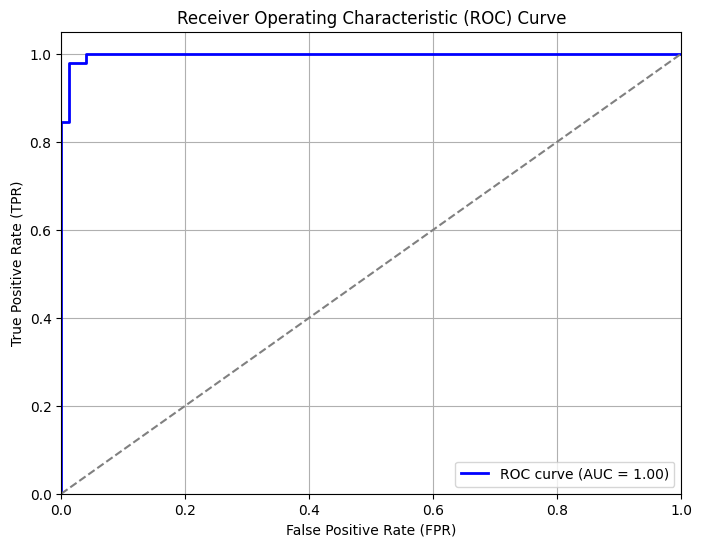

In [26]:
# Obtener las probabilidades de la clase positiva (1)
logit_probabilities = logit.predict_proba(X_test_scaled)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, logit_probabilities)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### 5.3.1 Optimización con hyperparámetros

In [27]:
# Crear el clasificador
lr_classifier = LogisticRegression(max_iter=1000)

# Definir el grid de hiperparámetros
hyper_params_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "l1_ratio": [0.1, 0.5, 0.7]  # Solo aplicable cuando penalty es 'elasticnet'
}

# Configuración para la optimización de hiperparámetros
# Asegurarse de manejar combinaciones inválidas
param_grid = [
    {"solver": ["newton-cg", "lbfgs", "sag"], "penalty": ["l2"], "C": [0.01, 0.1, 1, 10, 100]},
    {"solver": ["liblinear"], "penalty": ["l1", "l2"], "C": [0.01, 0.1, 1, 10, 100]},
    {"solver": ["saga"], "penalty": ["l1", "l2", "elasticnet"], "C": [0.01, 0.1, 1, 10, 100], "l1_ratio": [0.1, 0.5, 0.7]},
    {"solver": ["saga"], "penalty": ["none"]}
]

# Configuración para la optimización de hiperparámetros
lr_hyp_opt = GridSearchCV(estimator=lr_classifier, param_grid=param_grid, cv=10, scoring="roc_auc")

# Entrenar el modelo
lr_hyp_opt.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", lr_hyp_opt.best_params_)

c:\Users\Walter\anaconda3\envs\venv-bank-churning\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Walter\anaconda3\envs\venv-bank-churning\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Walter\anaconda3\envs\venv-bank-churning\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Walter\anaconda3\envs\venv-bank-churning\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Walter\anaconda3\envs\venv-bank-churning\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio pa

Mejores hiperparámetros: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


c:\Users\Walter\anaconda3\envs\venv-bank-churning\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Walter\anaconda3\envs\venv-bank-churning\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 710.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Walter\anaconda3\envs\venv-bank-churning\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Walter\anaconda3\envs\venv-bank-churnin

In [28]:
# score del mejor modelo
lr_hyp_opt.best_score_

0.9987902046783625

In [29]:
pd.DataFrame(lr_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
#nos mostrará un score de los mejores resultados

,rank_test_score,params,mean_test_score,std_test_score
23,1,"{'C': 100, 'penalty': 'l1', 'solver': 'libline...",0.998790,0.002421
21,2,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.998246,0.002680
59,2,"{'C': 10, 'l1_ratio': 0.7, 'penalty': 'l2', 's...",0.998246,0.002680
11,2,"{'C': 10, 'penalty': 'l2', 'solver': 'sag'}",0.998246,0.002680
9,2,"{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}",0.998246,0.002680
...,...,...,...,...
28,65,"{'C': 0.01, 'l1_ratio': 0.5, 'penalty': 'l1', ...",0.500000,0.000000
30,65,"{'C': 0.01, 'l1_ratio': 0.5, 'penalty': 'elast...",0.500000,0.000000
33,65,"{'C': 0.01, 'l1_ratio': 0.7, 'penalty': 'elast...",0.500000,0.000000
25,65,"{'C': 0.01, 'l1_ratio': 0.1, 'penalty': 'l1', ...",0.500000,0.000000


## 5.4 SVM

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train) #Entrenamiento del modelo

svm_predicts = svm.predict(X_test_scaled) #predicciones
roc_auc = roc_auc_score(svm_predicts, y_test)

print("Roc_Auc Score:", roc_auc)
print("Accuracy:", accuracy_score(y_test, svm_predicts))

In [ ]:
svm_predicts

In [ ]:
np.array(y_test)

In [ ]:
from sklearn.decomposition import PCA
# Ajustar PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Entrenar el modelo SVM con los datos reducidos
svm = SVC(kernel='linear')
svm.fit(X_train_pca, y_train)

# Predecir con el modelo SVM ajustado
svm_predicts = svm.predict(X_test_pca)
roc_auc = roc_auc_score(y_test, svm_predicts)

print("Roc_Auc Score:", roc_auc)
print("Accuracy:", accuracy_score(y_test, svm_predicts))

### 5.4.1 Gráfica de regiones de predicciones

In [ ]:
# Crear una malla para trazar los límites de decisión
h = 0.02  # tamaño del paso en la malla
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Trazar el límite de decisión del SVM lineal
Z_linear = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)
plt.contourf(xx, yy, Z_linear, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.title('Linear SVM con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

### 5.4.2 Optimización de hyper-parámetros para SVM

In [ ]:
# Crear el clasificador SVM con kernel lineal
svm_classifier = SVC(kernel='linear')

# Definir el grid de hiperparámetros
hyper_params_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "max_iter": [100, 500, 1000, 5000, -1]  # -1 significa sin límite en el número de iteraciones
}

# Configuración para la optimización de hiperparámetros
svm_hyp_opt = GridSearchCV(estimator=svm_classifier, param_grid=hyper_params_grid, cv=10, scoring="roc_auc")

# Entrenar el modelo
svm_hyp_opt.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", svm_hyp_opt.best_params_)

In [ ]:
# score del mejor modelo
svm_hyp_opt.best_score_

In [ ]:
pd.DataFrame(svm_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
#nos mostrará un score de los mejores resultados

## 5.5 Árboles de Decisión

In [30]:
DTC_Classifier = DecisionTreeClassifier()
DTC_Classifier.fit(X_train_scaled, y_train) #Entrenamiento del modelo

DTC_predicts = DTC_Classifier.predict(X_test_scaled) #predicciones
roc_auc = roc_auc_score(DTC_predicts, y_test)

print("Roc_Auc Score:", roc_auc)
print("Accuracy:", accuracy_score(y_test, DTC_predicts))

Roc_Auc Score: 0.9871794871794871
Accuracy: 0.9834710743801653


In [31]:
DTC_predicts

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [32]:
np.array(y_test)

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

### 5.5.1 Árboles de Decisión Optimización de Hyper-Parámetros

In [33]:
# Crear el clasificador Decision Tree
dt_classifier = DecisionTreeClassifier()

# Definir el grid de hiperparámetros
hyper_params_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": [2, 10, 20],
    "min_samples_leaf": [1, 5, 10],
    "max_features": [None, "sqrt", "log2"]
}

# Configuración para la optimización de hiperparámetros
dt_hyp_opt = GridSearchCV(estimator=dt_classifier, param_grid=hyper_params_grid, cv=10, scoring="roc_auc")

# Entrenar el modelo
dt_hyp_opt.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", dt_hyp_opt.best_params_)

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 20}


c:\Users\Walter\anaconda3\envs\venv-bank-churning\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [34]:
# score del mejor modelo
dt_hyp_opt.best_score_

0.9979532163742689

In [35]:
pd.DataFrame(dt_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
#nos mostrará un score de los mejores resultados

,rank_test_score,params,mean_test_score,std_test_score
20,1,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.997953,0.003710
247,2,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.996784,0.009649
264,2,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.996784,0.007786
193,2,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.996784,0.009649
301,2,"{'criterion': 'entropy', 'max_depth': 50, 'max...",0.996784,0.009649
...,...,...,...,...
126,320,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.950022,0.045982
253,321,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.949708,0.050489
261,322,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.948904,0.046654
234,323,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.945161,0.039388


## 5.6 Random Forest Classifier

In [ ]:
RF_Classifier = RandomForestClassifier()
RF_Classifier.fit(X_train_scaled, y_train) #Entrenamiento del modelo

rf_predicts = RF_Classifier.predict(X_test_scaled) #predicciones
roc_auc = roc_auc_score(rf_predicts, y_test)

print("Roc_Auc Score:", roc_auc)
print("Accuracy:", accuracy_score(y_test, rf_predicts))

In [ ]:
rf_predicts

In [ ]:
np.array(y_test)

### 5.6.1 Random Forest Classifier Optimización de Hyper-Parámetros

In [ ]:
rf_classifier = RandomForestClassifier()

hyper_params_grid = {
    "n_estimators": [10,50,100,500,1000],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10,25]
}#lista es un diccionario

#configuración para optimización de hiper parámetros

rf_hyp_opt = GridSearchCV(estimator=rf_classifier, param_grid=hyper_params_grid, cv=10, scoring="roc_auc")

#Entrenar modelo
rf_hyp_opt.fit(X_train_scaled, y_train)

In [ ]:
# score del mejor modelo
rf_hyp_opt.best_score_

In [ ]:
#mejores hyper-parametros
rf_hyp_opt.best_params_

In [ ]:
pd.DataFrame(rf_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
#nos mostrará un score de los mejores resultados

In [ ]:
#Registro del modelo
rf_model_register = RandomForestClassifier(n_estimators= 10, criterion = 'entropy', max_depth = 25)

rf_model_register.fit(X_train_scaled, y_train)

rf_predicts = rf_model_register.predict(X_test_scaled)

roc_auc_score(rf_predicts, y_test)

In [ ]:
# le pasamos toda la data, ya no podemos revisarlo
modelo_final = RandomForestClassifier(n_estimators=100, criterion= 'entropy', max_depth= None)

X_scaled = scaler.transform(X)

modelo_final.fit(X_scaled,y)

## 5.8 Análisis de discriminante cuadrático (QDA)

In [ ]:
QDA_Classifier = QuadraticDiscriminantAnalysis()
QDA_Classifier.fit(X_train_scaled, y_train) #Entrenamiento del modelo

QDA_predicts = QDA_Classifier.predict(X_test_scaled) #predicciones
roc_auc = roc_auc_score(QDA_predicts, y_test)

print("Roc_Auc Score:", roc_auc)
print("Accuracy:", accuracy_score(y_test, QDA_predicts))

In [ ]:
QDA_predicts

In [ ]:
np.array(y_test)

### 5.8.1 Optimización con hyper parámetros

In [ ]:
# Crear el clasificador QDA
qda_classifier = QuadraticDiscriminantAnalysis()

# Definir el grid de hiperparámetros
hyper_params_grid = {
    "reg_param": [0.0, 0.01, 0.1, 0.5, 1.0]
}

# Configuración para la optimización de hiperparámetros
qda_hyp_opt = GridSearchCV(estimator=qda_classifier, param_grid=hyper_params_grid, cv=10, scoring="roc_auc")

# Entrenar el modelo
qda_hyp_opt.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", qda_hyp_opt.best_params_)

In [ ]:
# score del mejor modelo
qda_hyp_opt.best_score_

In [ ]:
pd.DataFrame(qda_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
#nos mostrará un score de los mejores resultados

## 5.9 AdaBoost

In [ ]:
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_Classifier = AdaBoostClassifier(base_estimator, n_estimators=50, random_state=2025)
ada_Classifier.fit(X_train_scaled, y_train) #Entrenamiento del modelo

ada_predicts = ada_Classifier.predict(X_test_scaled) #predicciones
roc_auc = roc_auc_score(ada_predicts, y_test)

print("Roc_Auc Score:", roc_auc)
print("Accuracy:", accuracy_score(y_test, ada_predicts))

In [ ]:
ada_predicts

In [ ]:
np.array(y_test)

### 5.9.1 Optimización con hyper-parámetros para Ada Boost

In [ ]:
# Crear el clasificador AdaBoost con un árbol de decisión como estimador base
base_estimator = DecisionTreeClassifier()

# Crear el clasificador AdaBoost
ada_classifier = AdaBoostClassifier(base_estimator=base_estimator)

# Definir el grid de hiperparámetros
hyper_params_grid = {
    "n_estimators": [50, 100, 200, 500],
    "learning_rate": [0.01, 0.1, 1, 10],
    "base_estimator__max_depth": [1, 2, 3, 4, 5]  # Ajuste de hiperparámetros para el estimador base
}

# Configuración para la optimización de hiperparámetros
ada_hyp_opt = GridSearchCV(estimator=ada_classifier, param_grid=hyper_params_grid, cv=10, scoring="roc_auc")

# Entrenar el modelo
ada_hyp_opt.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", ada_hyp_opt.best_params_)

In [ ]:
# score del mejor modelo
ada_hyp_opt.best_score_

In [ ]:
pd.DataFrame(ada_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
#nos mostrará un score de los mejores resultados

## 5.10 Gradient Boosting

In [ ]:
gbc_Classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2025)
gbc_Classifier.fit(X_train_scaled, y_train) #Entrenamiento del modelo

gbc_predicts = gbc_Classifier.predict(X_test_scaled) #predicciones
roc_auc = roc_auc_score(gbc_predicts, y_test)

print("Roc_Auc Score:", roc_auc)
print("Accuracy:", accuracy_score(y_test, gbc_predicts))

In [ ]:
gbc_predicts

In [ ]:
np.array(y_test)

### 5.10.1 Optimización de hiperparámetros para Gradient Boosting

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import uniform, randint

# Crear el pipeline que incluya la estandarización y el clasificador Gradient Boosting
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier())
])

# Definir el espacio de búsqueda de hiperparámetros con distribuciones
param_distributions = {
    "gb__n_estimators": randint(50, 500),
    "gb__learning_rate": uniform(0.01, 1.0),
    "gb__max_depth": randint(3, 7),
    "gb__min_samples_split": randint(2, 20),
    "gb__min_samples_leaf": randint(1, 10),
    "gb__max_features": ["auto", "sqrt", "log2", None],
    "gb__subsample": uniform(0.6, 0.4)
}

# Configuración para la optimización de hiperparámetros con RandomizedSearchCV
gb_hyp_opt = RandomizedSearchCV(estimator=pipeline, param_distributions=param_distributions,
                                n_iter=50, cv=3, scoring="roc_auc", random_state=42, n_jobs=-1)

# Entrenar el modelo
gb_hyp_opt.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", gb_hyp_opt.best_params_)
print("Mejor puntuación AUC-ROC:", gb_hyp_opt.best_score_)

In [ ]:
# score del mejor modelo
gb_hyp_opt.best_score_

In [ ]:
pd.DataFrame(lr_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
#nos mostrará un score de los mejores resultados

## 5.11 XGBoost

In [ ]:
xgb_Classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2025)
xgb_Classifier.fit(X_train_scaled, y_train) #Entrenamiento del modelo

xgb_predicts = xgb_Classifier.predict(X_test_scaled) #predicciones
roc_auc = roc_auc_score(xgb_predicts, y_test)

print("Roc_Auc Score:", roc_auc)
print("Accuracy:", accuracy_score(y_test, xgb_predicts))

In [ ]:
xgb_predicts

In [ ]:
np.array(y_test)

### 5.11.1 Optimización de hiperparámetros con XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Crear el pipeline que incluya la estandarización y el clasificador XGBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Definir el grid de hiperparámetros
hyper_params_grid = {
    "xgb__n_estimators": [50, 100, 200],
    "xgb__learning_rate": [0.01, 0.1, 0.2],
    "xgb__max_depth": [3, 4, 5],
    "xgb__min_child_weight": [1, 3, 5],
    "xgb__gamma": [0, 0.1, 0.2],
    "xgb__subsample": [0.8, 1.0],
    "xgb__colsample_bytree": [0.8, 1.0]
}

# Configuración para la optimización de hiperparámetros
xgb_hyp_opt = GridSearchCV(estimator=pipeline, param_grid=hyper_params_grid, cv=3, scoring="roc_auc")

# Entrenar el modelo
xgb_hyp_opt.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", xgb_hyp_opt.best_params_)
print("Mejor puntuación AUC-ROC:", xgb_hyp_opt.best_score_)

In [ ]:
# score del mejor modelo
xgb_hyp_opt.best_score_

In [ ]:
pd.DataFrame(xgb_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
#nos mostrará un score de los mejores resultados

## 5.12 LGBM

In [ ]:
lgbm_Classifier = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2025)
lgbm_Classifier.fit(X_train_scaled, y_train) #Entrenamiento del modelo

lgbm_predicts = lgbm_Classifier.predict(X_test_scaled) #predicciones
roc_auc = roc_auc_score(lgbm_predicts, y_test)

print("Roc_Auc Score:", roc_auc)
print("Accuracy:", accuracy_score(y_test, lgbm_predicts))

In [ ]:
lgbm_predicts

In [ ]:
np.array(y_test)

### 5.12.1 Optimización de modelo LGBM con hiperparámetros

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from scipy.stats import uniform, randint

# Crear el pipeline que incluya la estandarización y el clasificador LGBM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lgbm', LGBMClassifier())
])

# Definir el espacio de búsqueda de hiperparámetros con distribuciones
param_distributions = {
    "lgbm__n_estimators": randint(50, 200),
    "lgbm__learning_rate": uniform(0.01, 0.2),
    "lgbm__max_depth": randint(3, 6),
    "lgbm__num_leaves": randint(31, 50),
    "lgbm__min_child_samples": randint(20, 40),
    "lgbm__subsample": uniform(0.8, 0.2),
    "lgbm__colsample_bytree": uniform(0.8, 0.2),
    "lgbm__reg_alpha": uniform(0, 0.5),
    "lgbm__reg_lambda": uniform(0, 0.5)
}

# Configuración para la optimización de hiperparámetros con RandomizedSearchCV
lgbm_hyp_opt = RandomizedSearchCV(estimator=pipeline, param_distributions=param_distributions,
                                  n_iter=50, cv=3, scoring="roc_auc", random_state=42, n_jobs=-1)

# Entrenar el modelo
lgbm_hyp_opt.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", lgbm_hyp_opt.best_params_)
print("Mejor puntuación AUC-ROC:", lgbm_hyp_opt.best_score_)

In [ ]:
# score del mejor modelo
lgbm_hyp_opt.best_score_

In [ ]:
pd.DataFrame(lgbm_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
#nos mostrará un score de los mejores resultados

# 6. Matriz de resultados de modelos

In [ ]:
# Convertir los resultados a DataFrames
df_lgbm = pd.DataFrame(lgbm_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
df_qda = pd.DataFrame(qda_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
df_nb = pd.DataFrame(nb_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
df_lr = pd.DataFrame(lr_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
df_svm = pd.DataFrame(svm_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
df_dt = pd.DataFrame(dt_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
df_rf = pd.DataFrame(rf_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
df_ada = pd.DataFrame(ada_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
df_gb = pd.DataFrame(lr_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
df_xgb = pd.DataFrame(xgb_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
df_lda = pd.DataFrame(lda_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]


# Añadir una columna para identificar el modelo
df_nb['model'] = 'Naive Bayes'
df_lr['model'] = 'Logistic Regression'
df_svm['model'] = 'SVM'
df_dt['model'] = 'Decision Tree'
df_rf['model'] = 'Random Forest'
df_ada['model'] = 'AdaBoost'
df_gb['model'] = 'GradientBoosting'
df_xgb['model'] = 'XGBoost'
df_lgbm['model'] = 'LGBM'
df_qda['model'] = 'QDA'
df_lda['model'] = 'LDA'

# Concatenar los resultados en un solo DataFrame
df_results = pd.concat([df_nb,df_lr, df_svm,df_dt,df_rf,df_ada,df_gb, df_xgb, df_lgbm, df_qda,df_lda], ignore_index=True)

df_results_sorted = df_results.sort_values("mean_test_score", ascending = False)

df_results_sorted

In [ ]:
# Guardar los mejores modelos en un archivo CSV
df_results_sorted.to_csv('../data/processed/df_results_sorted.csv', index=False)

# O guardar los mejores modelos en un archivo Excel
df_results_sorted.to_excel('../data/processed/df_results_sorted.xlsx', index=False)